In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_csv("C:\\Users\\kiril\\OneDrive\\Рабочий стол\\jupyter_projects\\insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0}) 
df=pd.get_dummies(data=df,columns=['region'],drop_first=True,dtype=int)   

In [6]:
df.shape

(1338, 9)

<Axes: >

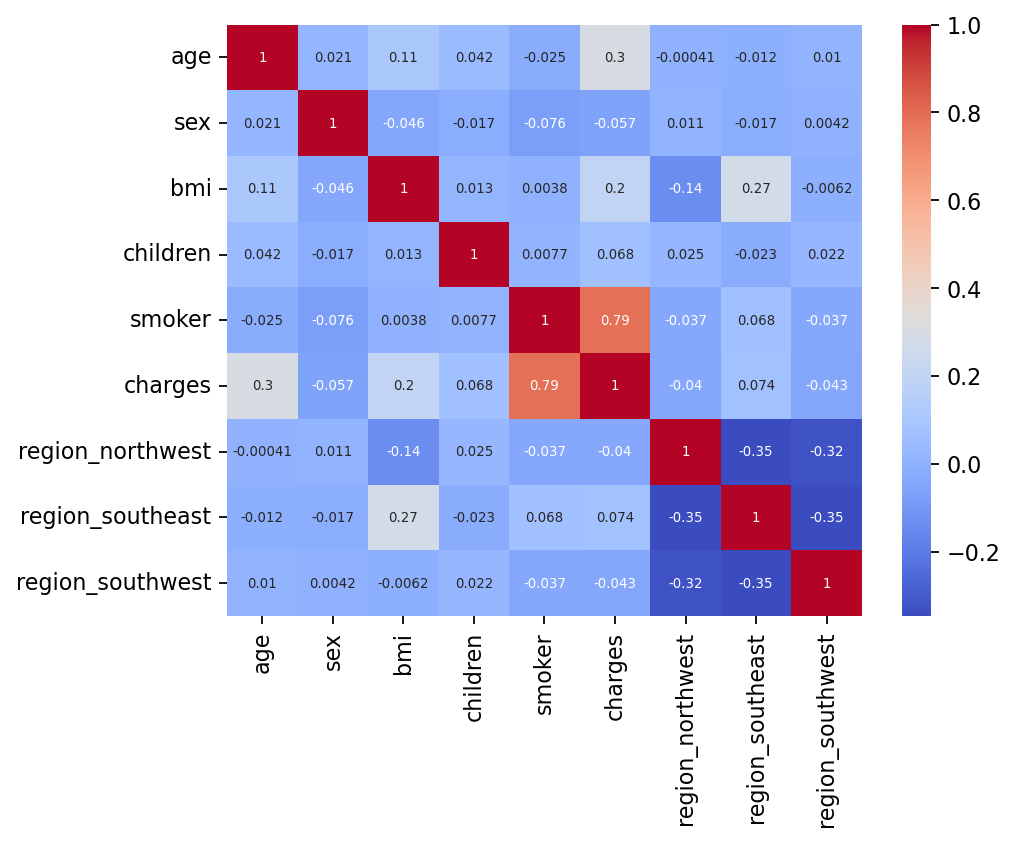

In [7]:
plt.figure(dpi=160)
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',annot_kws={'size':6})

In [8]:
X=df.drop('charges',axis=1)
y = np.log1p(df['charges'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Линейная регресиия**

In [9]:
model=LinearRegression()
model.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:

y_pred=model.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.1755091085532074
MAE: 0.26965057295320427
R2: 0.743700366501542


**Метод опорных векторов**

In [11]:
svr=SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train,y_train)
y_pred_svr=svr.predict(X_test)

mse=mean_squared_error(y_test,y_pred_svr)
mae=mean_absolute_error(y_test,y_pred_svr)
r2=r2_score(y_test,y_pred_svr)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.5416356667624184
MAE: 0.4290817277041846
R2: 0.39741477429000593


**Дерево решений**

In [12]:
decision_tree=DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train,y_train)
y_pred_tree=decision_tree.predict(X_test)

mse=mean_squared_error(y_pred_tree,y_test)
mae=mean_absolute_error(y_pred_tree,y_test)
r2=r2_score(y_pred_tree,y_test)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.20593524957578574
MAE: 0.20432752888219913
R2: 0.7855388659737736


**Рандомный лес**

In [13]:
random_forest=RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)
y_pred_rf=random_forest.predict(X_test)

mse=mean_squared_error(y_pred_rf,y_test)
mae=mean_absolute_error(y_pred_rf,y_test)
r2=r2_score(y_pred_rf,y_test)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.13787643316977582
MAE: 0.19510840053840126
R2: 0.8235633803122215


**Градиентный бустинг**

In [14]:
grad_boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
grad_boost.fit(X_train, y_train)
y_pred_gb = grad_boost.predict(X_test)
mse=mean_squared_error(y_pred_gb,y_test)
mae=mean_absolute_error(y_pred_gb,y_test)
r2=r2_score(y_pred_gb,y_test)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")


MSE: 0.12089431743119053
MAE: 0.18729481201133105
R2: 0.8415945802608756


**XGB**

In [15]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse=mean_squared_error(y_pred_xgb,y_test)
mae=mean_absolute_error(y_pred_xgb,y_test)
r2=r2_score(y_pred_xgb,y_test)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")


MSE: 0.14780466973099746
MAE: 0.19891153987967233
R2: 0.8182368390649686


**CatBoosting**

In [16]:
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

mse=mean_squared_error(y_pred_cat,y_test)
mae=mean_absolute_error(y_pred_cat,y_test)
r2=r2_score(y_pred_cat,y_test)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.12127618904736355
MAE: 0.18967703276408662
R2: 0.8332355559435645


**LBG**

In [17]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'verbose': -1,
    'seed': 42
}

lgb_model = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_eval)
y_pred_lgb = lgb_model.predict(X_test)

mse=mean_squared_error(y_pred_lgb,y_test)
mae=mean_absolute_error(y_pred_lgb,y_test)
r2=r2_score(y_pred_lgb,y_test)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.1418096614630122
MAE: 0.20597738880683444
R2: 0.8184596826052758


# Сравнение метрик моделей машинного обучения

| Модель | MSE | MAE | R2 |
|--------|-----|-----|----|
| Linear Regression | 0.1755091085532074| 0.26965057295320427 |  0.743700366501542|
| SVR |  0.5416356667624184| 0.4290817277041846| -0.38787818597940715|
| Decision Tree | 0.20593524957578574| 0.20432752888219913| 0.7855388659737736 |
| Random Forest |  0.13787643316977582|  0.19510840053840126| 0.8235633803122215 |
| Gradient Boosting |  0.12089431743119053| 0.18729481201133105| 0.8415945802608756  |
| XGBoost | 0.14780466973099746| 0.19891153987967233| 0.8182368390649686 |
| CatBoost |  0.12127618904736355|  0.18967703276408662|  0.8332355559435645 |
| LightGBM |  0.1418096614630122| 0.20597738880683444 |  0.8184596826052758|


# Топ-3 модели по качеству предсказания

На основе метрик **MSE** (чем меньше — тем лучше), **MAE** (чем меньше — тем лучше) и **R2** (чем ближе к 1 — тем лучше), лучшими моделями являются:

| Место | Модель             | MSE    | MAE    | R2     |
|-------|--------------------|--------|--------|--------|
| 1     | Gradient Boosting  | 0.1209 | 0.1873 | 0.8416 |
| 2     | CatBoost           | 0.1213 | 0.1897 | 0.8332 |
| 3     | Random Forest      | 0.1379 | 0.1951 | 0.8236 |

**Вывод**

Gradient Boosting показал наилучшие результаты по всем трём метрикам. CatBoost почти не уступает лидеру, особенно по MSE. Random Forest замыкает тройку лидеров, демонстрируя стабильно высокое качество и меньшую склонность к переобучению.

Остальные модели (XGBoost, LightGBM, Decision Tree, Linear Regression, SVR) показали худшую производительность на данном датасете.

# Используем hyperopt

In [18]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

**Линейная регрессия**

In [19]:

def objective_linear(params):
    model_lr = LinearRegression(
        fit_intercept=params['fit_intercept'],
        copy_X=params['copy_X'],
        n_jobs=int(params['n_jobs'])
    )
    
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lr)
    
    return {'loss': mse, 'status': STATUS_OK}
    

space_linear = {
    'fit_intercept': hp.choice('fit_intercept', [True, False]),
    'copy_X': hp.choice('copy_X', [True, False]),
    'n_jobs': hp.choice('n_jobs', [-1, 1, 2, 4])
}

trials = Trials()

best_linear = fmin(
    fn=objective_linear,
    space=space_linear,
    algo=tpe.suggest,
    max_evals=200,  
    trials=trials,
    rstate=np.random.default_rng(42)
)


best_lr_model = LinearRegression(
    fit_intercept=[True, False][best_linear['fit_intercept']],
    copy_X=[True, False][best_linear['copy_X']],
    n_jobs=[-1, 1, 2, 4][best_linear['n_jobs']]
)

best_lr_model.fit(X_train, y_train)
y_pred_lr = best_lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MSE: {mse_lr}")
print(f"MAE: {mae_lr}")
print(f"R2: {r2_lr}")


100%|██████████| 200/200 [00:01<00:00, 144.53trial/s, best loss: 0.1755091085532074]
MSE: 0.1755091085532074
MAE: 0.26965057295320427
R2: 0.8047410791393023


**Метод опорных векторов**

In [20]:
def objective_svr(params):
    model = SVR(kernel='rbf', C=params['C'], gamma=params['gamma'], epsilon=params['epsilon'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return {'loss': mse, 'status': STATUS_OK}


space_svr = {
    'C': hp.loguniform('C', -4, 4),        
    'gamma': hp.loguniform('gamma', -7, 2), 
    'epsilon': hp.uniform('epsilon', 0.01, 0.3)
}

trials = Trials()

best = fmin(
    fn=objective_svr,
    space=space_svr,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials,
    rstate=np.random.default_rng(42)
)

best_svr = SVR(kernel='rbf', C=best['C'], gamma=best['gamma'], epsilon=best['epsilon'])
best_svr.fit(X_train, y_train)
y_pred_svr = best_svr.predict(X_test)


mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"MSE: {mse_svr}")
print(f"MAE: {mae_svr}")
print(f"R2: {r2_svr}")

100%|██████████| 200/200 [00:20<00:00,  9.84trial/s, best loss: 0.1273314181519758]
MSE: 0.1273314181519758
MAE: 0.16234081287558305
R2: 0.858340142543202


**Дерево решений**

In [21]:
def objective_tree(params):
    model_tree = DecisionTreeRegressor(
        max_depth=params['max_depth'],
        min_samples_split=int(params['min_samples_split']), 
        min_samples_leaf=int(params['min_samples_leaf']),    
        max_features=params['max_features'],
        min_impurity_decrease=params['min_impurity_decrease'],
        random_state=42
    )

    model_tree.fit(X_train, y_train)
    y_pred_tree = model_tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_tree)

    return {'loss': mse, 'status': STATUS_OK}

max_features_opts = ['sqrt', 'log2', 0.8, 0.9]  

space_tree = {
    'max_depth': hp.choice('max_depth', [6, 7, 8, 9, 10, 11, 12]),  
    'min_samples_split': hp.quniform('min_samples_split', 5, 35, 1),  
    'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 20, 1),    
    'max_features': hp.choice('max_features', max_features_opts),
    'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.0001, 0.005)  
}

trials = Trials()# пишем историю

#лучшие параметры
best = fmin(
    fn=objective_tree,
    space=space_tree,
    algo=tpe.suggest,
    max_evals=300,
    trials=trials,
    rstate=np.random.default_rng(42)
)


best_max_features = max_features_opts[best['max_features']]

best_tree = DecisionTreeRegressor(
    max_depth=best['max_depth'],
    min_samples_leaf=int(best['min_samples_leaf']),      
    min_samples_split=int(best['min_samples_split']),    
    max_features=best_max_features,
    min_impurity_decrease=best['min_impurity_decrease'],
    random_state=42
)

best_tree.fit(X_train, y_train)
y_pred_tree = best_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"MSE: {mse_tree:}")
print(f"MAE: {mae_tree:}")
print(f"R2: {r2_tree}")

  0%|          | 0/300 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 300/300 [00:06<00:00, 44.71trial/s, best loss: 0.1277196989061897] 
MSE: 0.1339472249129671
MAE: 0.2162885272045191
R2: 0.8509798676297068


**Рандомный лес**


In [22]:

def objective_random_forest(params):
    model_rf = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=params['max_depth'],
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features'],
        min_impurity_decrease=params['min_impurity_decrease'],
        random_state=42,
    )

    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rf)

    return {'loss': mse, 'status': STATUS_OK}

max_features_opts = ['sqrt', 'log2', 0.8, 0.9]

space_random_forest = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),  
    'max_depth': hp.choice('max_depth', [4, 5, 6, 7, 8, 9, 10, 11, 12]),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),  
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 15, 1),    
    'max_features': hp.choice('max_features', max_features_opts),
    'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.0, 0.001)
}

trials = Trials()

best_rf = fmin(
    fn=objective_random_forest,
    space=space_random_forest,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials,
    rstate=np.random.default_rng(42)
)


best_max_features_rf = max_features_opts[best_rf['max_features']]

best_rf_model = RandomForestRegressor(
    n_estimators=int(best_rf['n_estimators']),
    max_depth=best_rf['max_depth'],
    min_samples_leaf=int(best_rf['min_samples_leaf']),      
    min_samples_split=int(best_rf['min_samples_split']),    
    max_features=best_max_features_rf,
    min_impurity_decrease=best_rf['min_impurity_decrease'],
    random_state=42,
)

best_rf_model.fit(X_train, y_train)
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")
print(f"R2: {r2_rf}")

  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [01:06<00:00,  3.02trial/s, best loss: 0.12118198240845154]
MSE: 0.12167239231932578
MAE: 0.18769723511249417
R2: 0.8646359712116671


**Градиентный бустинг**

In [23]:
def objective_gb(params):
    model_gb = GradientBoostingRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features_val'], 
        subsample=params['subsample'],
        random_state=42
    )

    model_gb.fit(X_train, y_train)
    y_pred_gb = model_gb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_gb)

    return {'loss': mse, 'status': STATUS_OK}

max_features_opts = ['sqrt', 'log2', None, 0.8, 0.9]

space_gb = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 6, 1),
    'min_samples_split': hp.quniform('min_samples_split', 5, 50, 5),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 30, 3),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'max_features_val': hp.choice('max_features_val', max_features_opts)  
}

trials = Trials()

best_gb = fmin(
    fn=objective_gb,
    space=space_gb,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials,
    rstate=np.random.default_rng(42)
)


best_gb_model = GradientBoostingRegressor(
    n_estimators=int(best_gb['n_estimators']),
    learning_rate=best_gb['learning_rate'],
    max_depth=int(best_gb['max_depth']),
    min_samples_leaf=int(best_gb['min_samples_leaf']),
    min_samples_split=int(best_gb['min_samples_split']),
    max_features=max_features_opts[best_gb['max_features_val']],  
    subsample=best_gb['subsample'],
    random_state=42
)

best_gb_model.fit(X_train, y_train)
y_pred_gb = best_gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f" MSE: {mse_gb}")
print(f" MAE: {mae_gb}")
print(f"R2: {r2_gb}")

100%|██████████| 200/200 [01:01<00:00,  3.23trial/s, best loss: 0.11803900454643756]
 MSE: 0.11803900454643756
 MAE: 0.18375232459661345
R2: 0.8686782193972508


**XGBoost**

In [24]:
from xgboost import XGBRegressor

def objective_xgb(params):
    model_xgb = XGBRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        gamma=params['gamma'],
        random_state=42,
        n_jobs=-1 # ускорение вычислений( )
    )

    model_xgb.fit(X_train, y_train)
    y_pred_xgb = model_xgb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_xgb)

    return {'loss': mse, 'status': STATUS_OK}

space_xgb = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'learning_rate': hp.loguniform('learning_rate', -3, 0), # 0.001 0.01 0.1 1 (0.001 - 1) 
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1), # L1
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),# L2
    'gamma': hp.uniform('gamma', 0, 0.5)
}

trials = Trials()

best_xgb = fmin(
    fn=objective_xgb,
    space=space_xgb,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials,
    rstate=np.random.default_rng(42)
)


best_xgb_model = XGBRegressor(
    n_estimators=int(best_xgb['n_estimators']),
    learning_rate=best_xgb['learning_rate'],
    max_depth=int(best_xgb['max_depth']),
    min_child_weight=int(best_xgb['min_child_weight']),
    subsample=best_xgb['subsample'],
    colsample_bytree=best_xgb['colsample_bytree'],
    reg_alpha=best_xgb['reg_alpha'],
    reg_lambda=best_xgb['reg_lambda'],
    gamma=best_xgb['gamma'],
    random_state=42,
    n_jobs=-1
)

best_xgb_model.fit(X_train, y_train)
y_pred_xgb = best_xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R2: {r2_xgb}")

100%|██████████| 200/200 [00:15<00:00, 12.68trial/s, best loss: 0.11671821430620981]
XGBoost MSE: 0.11671821430620981
XGBoost MAE: 0.18341262397126196
XGBoost R2: 0.8701476364498252


**CatBoost**

In [25]:

def objective_catboost(params):
    model_cb = CatBoostRegressor(
        iterations=int(params['iterations']),
        learning_rate=params['learning_rate'],
        depth=int(params['depth']),
        l2_leaf_reg=params['l2_leaf_reg'],
        random_strength=params['random_strength'],
        bagging_temperature=params['bagging_temperature'],
        border_count=int(params['border_count']),
        random_state=42,
        verbose=False,  
        thread_count=-1  # ускорение
    )

    model_cb.fit(X_train, y_train)
    y_pred_cb = model_cb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_cb)

    return {'loss': mse, 'status': STATUS_OK}

space_catboost = {
    'iterations': hp.quniform('iterations', 100, 1000, 50), # кол-во деревьев
    'learning_rate': hp.loguniform('learning_rate', -3, 0),  
    'depth': hp.quniform('depth', 4, 10, 1),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'random_strength': hp.uniform('random_strength', 0, 2),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'border_count': hp.quniform('border_count', 32, 255, 1)# разбиение на интервалы
}

trials = Trials()

best_cb = fmin(
    fn=objective_catboost,
    space=space_catboost,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials,
    rstate=np.random.default_rng(42)
)


best_cb_model = CatBoostRegressor(
    iterations=int(best_cb['iterations']),
    learning_rate=best_cb['learning_rate'],
    depth=int(best_cb['depth']),
    l2_leaf_reg=best_cb['l2_leaf_reg'],
    random_strength=best_cb['random_strength'],
    bagging_temperature=best_cb['bagging_temperature'],
    border_count=int(best_cb['border_count']),
    random_state=42,
    verbose=False,
    thread_count=-1
)

best_cb_model.fit(X_train, y_train)
y_pred_cb = best_cb_model.predict(X_test)

mse_cb = mean_squared_error(y_test, y_pred_cb)
mae_cb = mean_absolute_error(y_test, y_pred_cb)
r2_cb = r2_score(y_test, y_pred_cb)

print(f"CatBoost MSE: {mse_cb}")
print(f"CatBoost MAE: {mae_cb}")
print(f"CatBoost R2: {r2_cb}")

100%|██████████| 200/200 [02:08<00:00,  1.56trial/s, best loss: 0.11760783503949919]
CatBoost MSE: 0.11760783503949919
CatBoost MAE: 0.1838852153983557
CatBoost R2: 0.8691579078494732


In [26]:

def objective_lgb(params):
    model_lgb = LGBMRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        num_leaves=int(params['num_leaves']),
        min_child_samples=int(params['min_child_samples']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        random_state=42,
        n_jobs=-1 # ускорение
    )

    model_lgb.fit(X_train, y_train)
    y_pred_lgb = model_lgb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lgb)

    return {'loss': mse, 'status': STATUS_OK}

space_lgb = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),  
    'max_depth': hp.quniform('max_depth', 3, 12, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 5),
    'min_child_samples': hp.quniform('min_child_samples', 5, 100, 5),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

trials = Trials()

best_lgb = fmin(
    fn=objective_lgb,
    space=space_lgb,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials,
    rstate=np.random.default_rng(42)
)



best_lgb_model = LGBMRegressor(
    n_estimators=int(best_lgb['n_estimators']),
    learning_rate=best_lgb['learning_rate'],
    max_depth=int(best_lgb['max_depth']),
    num_leaves=int(best_lgb['num_leaves']),
    min_child_samples=int(best_lgb['min_child_samples']),
    subsample=best_lgb['subsample'],
    colsample_bytree=best_lgb['colsample_bytree'],
    reg_alpha=best_lgb['reg_alpha'],
    reg_lambda=best_lgb['reg_lambda'],
    random_state=42,
    n_jobs=-1,
    verbose=-1# 2 мой ноутбук не тянет
)

best_lgb_model.fit(X_train, y_train)
y_pred_lgb = best_lgb_model.predict(X_test)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM MSE: {mse_lgb}")
print(f"LightGBM MAE: {mae_lgb}")
print(f"LightGBM R2: {r2_lgb}")

100%|██████████| 200/200 [00:24<00:00,  8.23trial/s, best loss: 0.11658787982727667]
LightGBM MSE: 0.11658787982727667
LightGBM MAE: 0.18673264343650756
LightGBM R2: 0.8702926372985972


| Модель | MSE до | MAE до  | R2 до| MSE после | MAE после  | R2 после|
|--------|--------|---------|------|-----------|------------|---------|
| Linear Regression | 0.1755091085532074| 0.26965057295320427 |  0.743700366501542| MSE: 0.1755091085532074|0.26965057295320427| 0.8047410791393023|
| SVR |   0.5416356667624184| 0.4290817277041846| 0.39741477429000593| 0.1273314181519758| 0.16234081287558305 | 0.858340142543202|
| Decision Tree | 0.20593524957578574| 0.20432752888219913| 0.7855388659737736 |  0.1339472249129671|0.2162885272045191|0.8509798676297068|
| Random Forest |  0.13787643316977582|  0.19510840053840126| 0.8235633803122215 |0.12167239231932578|0.18769723511249417|0.8646359712116671|
| Gradient Boosting |  0.12089431743119053| 0.18729481201133105| 0.8415945802608756  |0.11803900454643756|0.18375232459661345| 0.8686782193972508|
| XGBoost | 0.14780466973099746| 0.19891153987967233| 0.8182368390649686 | 0.11671821430620981|0.18341262397126196| 0.8701476364498252|
| CatBoost |  0.12127618904736355|  0.18967703276408662|  0.8332355559435645 |0.11760783503949919|0.1838852153983557|0.8691579078494732|
| LightGBM |  0.1418096614630122| 0.20597738880683444 |  0.8184596826052758|0.11658787982727667|0.18673264343650756|0.8702926372985972|



## Выводы по улучшению метрик после применения Hyperopt

**LinearRegression** - метрика **MSE** улучшилась на **0%** (с 0.1755 до 0.1755)  
**LinearRegression** - метрика **MAE** улучшилась на **0%** (с 0.2697 до 0.2697)  
**LinearRegression** - метрика **R²** улучшилась на **8.21%** (с 0.7437 до 0.8047)

**SVR** - метрика **MSE** улучшилась на **76.49%** (с 0.5416 до 0.1273)  
**SVR** - метрика **MAE** улучшилась на **62.17%** (с 0.4291 до 0.1623)  
**SVR** - метрика **R²** улучшилась на **115.87%** (с 0.3974 до 0.8583)

**Decision Tree** - метрика **MSE** улучшилась на **34.94%** (с 0.2059 до 0.1339)  
**Decision Tree** - метрика **MAE** ухудшилась на **5.85%** (с 0.2043 до 0.2163)  
**Decision Tree** - метрика **R²** улучшилась на **8.33%** (с 0.7855 до 0.8510)

**Random Forest** - метрика **MSE** улучшилась на **11.75%** (с 0.1379 до 0.1217)  
**Random Forest** - метрика **MAE** улучшилась на **3.80%** (с 0.1951 до 0.1877)  
**Random Forest** - метрика **R²** улучшилась на **4.99%** (с 0.8236 до 0.8646)

**Gradient Boosting** - метрика **MSE** улучшилась на **2.36%** (с 0.1209 до 0.1180)  
**Gradient Boosting** - метрика **MAE** улучшилась на **1.89%** (с 0.1873 до 0.1838)  
**Gradient Boosting** - метрика **R²** улучшилась на **3.22%** (с 0.8416 до 0.8687)

**XGBoost** - метрика **MSE** улучшилась на **21.04%** (с 0.1478 до 0.1167)  
**XGBoost** - метрика **MAE** улучшилась на **7.79%** (с 0.1989 до 0.1834)  
**XGBoost** - метрика **R²** улучшилась на **6.35%** (с 0.8182 до 0.8701)

**CatBoost** - метрика **MSE** улучшилась на **3.03%** (с 0.1213 до 0.1176)  
**CatBoost** - метрика **MAE** улучшилась на **3.05%** (с 0.1897 до 0.1839)  
**CatBoost** - метрика **R²** улучшилась на **4.31%** (с 0.8332 до 0.8692)

**LightGBM** - метрика **MSE** улучшилась на **17.79%** (с 0.1418 до 0.1166)  
**LightGBM** - метрика **MAE** улучшилась на **9.34%** (с 0.2060 до 0.1867)  
**LightGBM** - метрика **R²** улучшилась на **6.33%** (с 0.8185 до 0.8703)

## Ключевые наблюдения:

1. **SVR показал наибольший абсолютный прогресс** - все метрики улучшились кардинально
2. **Decision Tree** - **единственный алгоритм**, у которого ухудшилась одна метрика (MAE)
3. **LightGBM и XGBoost** показали сходные улучшения по R² (около 6.3%)
4. **Gradient Boosting и CatBoost** улучшились минимально, что говорит о том, что их стандартные параметры уже были близки к оптимальным
5. **Все алгоритмы** показали улучшение после оптимизации Hyperopt